## Sequnce of reference sites
1. [How to Develop Multivariate Multi-Step Time Series Forecasting Models for Air Pollution](https://machinelearningmastery.com/how-to-develop-machine-learning-models-for-multivariate-multi-step-air-pollution-time-series-forecasting/)  
2. [4 Strategies for Multi-Step Time Series Forecasting](https://machinelearningmastery.com/multi-step-time-series-forecasting/)  
3. [Multistep Time Series Forecasting with LSTMs in Python](https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/)  
4. [Multi-Step LSTM Time Series Forecasting Models for Power Usage](https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/)  
5. [How to Scale Data for Long Short-Term Memory Networks in Python](https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/)  
6. [How to Use XGBoost for Time Series Forecasting](https://machinelearningmastery.com/xgboost-for-time-series-forecasting/)  
7. [How To Backtest Machine Learning Models for Time Series Forecasting](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/) 

## Data Wrangling

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utility
import math

EXPERIEMENT_SEED = 42
np.random.seed(EXPERIEMENT_SEED)

### Importing Dataset

In [2]:
weather_df = utility.get_processed_dataset()
weather_df.head(4)

,pyranometer,pyroheliometer,azimuth_angle_deg,tower_dry_bulb_temp_deg,tower_wet_bulb_temp_deg,tower_dew_point_deg,tower_rh_pct,peak_wind_speed_mps,avg_wind_direction_deg,station_pressure_mbar,precipitation_mm,snow_depth_cm,moisture,albedometer,datetime_cpy,total_cloud_coverage_pct
datetime,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,9.95,271.3,806.779,0.0,0.219,0.0,0.0,2020-01-01 00:00:00,-1
2020-01-01 00:01:00,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,8.20,272.9,806.840,0.0,0.206,0.0,0.0,2020-01-01 00:01:00,-1
2020-01-01 00:02:00,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,6.70,288.8,806.876,0.0,0.148,0.0,0.0,2020-01-01 00:02:00,-1
2020-01-01 00:03:00,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,7.70,294.0,806.823,0.0,0.235,0.0,0.0,2020-01-01 00:03:00,-1


### Sampling One Day Data example

In [3]:
weather_df_1day = weather_df.loc['2020-01-01 00:00:00' : '2020-01-01 23:59:00'] \
                                .loc[weather_df['total_cloud_coverage_pct'] > -1]
weather_df_1day.head(4)

,pyranometer,pyroheliometer,azimuth_angle_deg,tower_dry_bulb_temp_deg,tower_wet_bulb_temp_deg,tower_dew_point_deg,tower_rh_pct,peak_wind_speed_mps,avg_wind_direction_deg,station_pressure_mbar,precipitation_mm,snow_depth_cm,moisture,albedometer,datetime_cpy,total_cloud_coverage_pct
datetime,,,,,,,,,,,,,,,,
2020-01-01 07:47:00,14.4935,0.079127,123.84491,6.933,1.403,-5.597,38.24,0.7,210.3,802.042,0.0,0.032,0.0,0.1951,2020-01-01 07:47:00,6
2020-01-01 07:48:00,16.5178,-0.034618,124.01096,6.793,1.294,-5.606,38.58,0.7,232.2,801.948,0.0,0.029,0.0,0.1867,2020-01-01 07:48:00,8
2020-01-01 07:49:00,18.6171,-0.153309,124.17734,6.674,1.260,-5.540,39.12,1.7,263.9,801.940,0.0,0.173,0.0,0.1783,2020-01-01 07:49:00,10
2020-01-01 07:50:00,20.5986,-0.143419,124.34405,6.646,1.306,-5.494,39.35,2.2,277.5,801.927,0.0,0.144,0.0,0.1758,2020-01-01 07:50:00,13


In [4]:
training_labels = utility.series_to_supervised(list(weather_df_1day['total_cloud_coverage_pct']), n_out=10)
training_labels.shape

(509, 11)

### Tentatively Selecting K best features per output label
Tentatively selecting K best features per output $t+n^{th}$ where n is future values after  minutes =  {10, 20, 30} to construct and train base architecture quickly

In [5]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

# define feature selection
fs = SelectKBest(score_func=f_regression, k=6)

# apply feature selection
fs.fit_transform(weather_df.iloc[:, :-2].values, weather_df.iloc[:, -1].values)
print("best Feature Indices: ", fs.get_support(indices=True))

best_feature_cols = list(weather_df.columns[fs.get_support(indices=True)])
print("Best Features: ", best_feature_cols)

best Feature Indices:  [ 0  3  4  5  8 13]
Best Features:  ['pyranometer', 'tower_dry_bulb_temp_deg', 'tower_wet_bulb_temp_deg', 'tower_dew_point_deg', 'avg_wind_direction_deg', 'albedometer']


### Training Testing Dataset Formatting

In [6]:
def prepare_usable_dataset(dataset, best_feature_cols = None, months = None):

    #Removing non recorded cloud coverages
    
    mask = (dataset.datetime_cpy.dt.month.isin(months) & (dataset['total_cloud_coverage_pct'] > -1)) if months else (dataset['total_cloud_coverage_pct'] > -1)
    #if not months:
    dataset = dataset.loc[mask] #Import full dataset
    #else:
        #dataset =  dataset.loc[dataset.datetime_cpy.dt.month.isin(months) & (dataset['total_cloud_coverage_pct'] > -1)] #Import selected months
    
    if best_feature_cols:
        dataset = pd.concat([dataset[best_feature_cols], dataset[['total_cloud_coverage_pct']]], axis=1)
    
    #Rescaling total_cloud_coverage_pct to percent values
    dataset['total_cloud_coverage_pct'] = dataset['total_cloud_coverage_pct'] / 100
    
    #Drop datetime column if present
    if 'datetime_cpy' in dataset.columns:
        dataset = dataset.drop(['datetime_cpy'], axis=1)

    return dataset

def prepare_daywise_chunked_dataset(dataset):
    np.random.seed(EXPERIEMENT_SEED)
    # map month_daywise mapped dictionary
    month_day_pairs = utility.get_month_day_pairing(dataset)

    dataset_chunked = {}
    min_uptime_duration = np.inf;
    max_uptime_duration = -np.inf;

    for month, day in month_day_pairs:
        daily_chunk = dataset.loc[((dataset.index.month == month) & ( dataset.index.day == day)), :].values
        #TODO: Later Segment active minutes such that only 60 mins spaced time frames are present
        total_daily_active_minutes = np.shape(daily_chunk)[0]
        #Using for max 8 hours of data per day to keep other splits simple
        max_daily_minutes = 8 * 60

        #Segmenting for max 8 hours per day
        dataset_chunked[(month,day)] = daily_chunk[:max_daily_minutes,:]

        if(total_daily_active_minutes < min_uptime_duration):
            min_uptime_duration = total_daily_active_minutes

        if(total_daily_active_minutes > max_uptime_duration):
            max_uptime_duration = total_daily_active_minutes

    print("Shape of a sample day record (8 hours * 60, num_features): {}".format(np.shape(dataset_chunked[next(iter(dataset_chunked))])))
    print("Min-Max Active Uptime in Hours: (%d,%d)\n" % ((min_uptime_duration // 60) ,(max_uptime_duration // 60)))

    dataset_chunked_arr = list(dataset_chunked.items()) 
    
    #Shuffled chunks randomly day wise (Mintues information per day is still intact)
    np.random.shuffle(dataset_chunked_arr)  
    dataset_chunked = dict(dataset_chunked_arr)
    
    print("First Random Three days: ")
    for itr, (key, value) in enumerate(dataset_chunked.items()):
        print(key, end="  ")
        if itr == 2:
            break
    return dataset_chunked


def get_train_test_split(dataset, test_ratio=0.09, best_feature_cols = None, months = None):
    
    dataset = prepare_usable_dataset(dataset, best_feature_cols, months)
    print("Original dataset shape: ", dataset.shape)
    print("----------------------------------------------------------------")
    dataset_chuncked = prepare_daywise_chunked_dataset(dataset)
    print("\n----------------------------------------------------------------")
    dataset = np.array([arr for arr in dataset_chuncked.values()])
    print("Dataset shape after daywise chunks", dataset.shape)
    print("----------------------------------------------------------------")
    #Splitting dataset into train test
    test_size = math.floor(dataset.shape[0] * test_ratio)
    train, test = dataset[:-test_size,:,:] , dataset[-test_size:,:,:]
    print("Data shape with reference format: [num_instances, num_time_steps, num_features]")
    print("Training shape {} , Testing Shape {}".format(train.shape, test.shape))
    
    #Get month,day indexes for train test for debugging
    month_day_wise_indexes = list(dataset_chuncked.keys())
    train_monthdays, test_monthdays = month_day_wise_indexes[:-test_size], month_day_wise_indexes[-test_size:]
    
    return train, test, train_monthdays, test_monthdays

### Standard Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

def fit_transform_standard_scaler(train_x, test_x = np.array([])):
    scaler = StandardScaler()
    num_instances_train, num_time_steps, num_features = train_x.shape

    train_x = np.reshape(train_x, newshape=(-1, num_features))
    train_x = scaler.fit_transform(train_x)
    train_x = np.reshape(train_x, newshape=(num_instances_train, num_time_steps, num_features))
    
    if test_x.size > 0:
        num_instances_test = test_x.shape[0]
        
        test_x = np.reshape(test_x, newshape=(-1, num_features))
        test_x = scaler.transform(test_x)
        test_x = np.reshape(test_x, newshape=(num_instances_test, num_time_steps, num_features))
    
    return scaler, train_x, test_x

In [8]:
# univariate multi-step lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM

tf.random.set_seed(EXPERIEMENT_SEED)

weather_models = {}

Splitting train and test data for 1 day each

In [9]:
#Training to find future values 15 minutes ahead given 6 hours of data
# convert history into inputs and outputs
def to_supervised(data, n_input, n_out=15):
    # flatten data
    X, y = list(), list()

    #Make batches of n_input minutes in sequnce in only given day
    for day in range(len(data)):
        in_start = 0

        day_data = data[day, :, :]
        # step over the entire history one time step at a time
        for _ in range(len(day_data)):
            # define the end of the input sequence
            in_end = in_start + n_input
            out_end = in_end + n_out
            # ensure we have enough day_data for this instance
            if out_end <= len(day_data):
                #x_input = day_data[in_start:in_end, -1]  #Univariate - using only last column total_cloud_coverage_pct
                x_input = day_data[in_start:in_end, :]
                #x_input = x_input.reshape((len(x_input), 1))  # IDK why I added this
                X.append(x_input)
                y.append(day_data[in_end:out_end, -1]) #Univariate - using only last column total_cloud_coverage_pct
            # move along one time step
            in_start += 1
    return array(X), array(y)

In [10]:

# Evaluate modle for only 30 minute mark forcasts of the day for each day
# Note: Rescaling evaluations back to (0,100) scale from ratio scale
def evaluate_forecasts_daily_eod_prediction(predicted, actual, days_sampled=1, minutes_marks=[30]):
    
    rmse_scores = list()
    mae_scores = list()
    
    eod_steps = actual.shape[0] // days_sampled
    start = eod_steps - 1
    
    for mark in minutes_marks:
        mark = mark - 1 #Since python indexing starts from 0
        
        # calculate mse 
        mse = mean_squared_error(actual[start : : eod_steps, mark], predicted[start : : eod_steps, mark])
        # calculate rmse
        rmse = sqrt(mse) * 100
        #calculate mae
        mae = mean_absolute_error(actual[start : : eod_steps, mark], predicted[start : : eod_steps, mark]) * 100
        
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    return rmse_scores, mae_scores


In [11]:
def plot_model_evaluation(history, data_x, data_pred_y, data_actual_y, item):
    fig, axes = plt.subplots(ncols=2, figsize=(25,5), gridspec_kw={'width_ratios': [1, 2.5]})
    axes[0].plot(history.history['mae'], label="train_mae")
    axes[0].plot(history.history['val_mae'], label="test_mae")
    axes[0].set_title("Model History", fontsize=16)
    axes[0].legend()


    axes[1].plot(np.concatenate([data_x[item, :, -1].flatten(), data_pred_y[item]]), 'r-', label="Predicted Output")
    axes[1].plot(np.concatenate([data_x[item, :, -1].flatten(), data_actual_y[item]]), 'g-', label="Actual Output")
    axes[1].plot(data_x[item, :, -1].flatten(), 'b-', label="Input")
    axes[1].set_xlabel("Minutes")
    axes[1].set_ylabel("total_cloud_coverage_pct %")
    axes[1].legend()
    axes[1].set_title("Sample Training set input ({} min) and output ({} min) cloud coverage".format(INPUT_DURATION_MINS,PRED_DURATION_MINS), fontsize=16)

    plt.show()

## Import train test dataset

In [12]:
train, test, train_monthdays, test_monthdays = get_train_test_split(weather_df, months=[1,8], test_ratio=0.09, best_feature_cols=best_feature_cols)

Original dataset shape:  (40829, 7)
----------------------------------------------------------------
Shape of a sample day record (8 hours * 60, num_features): (480, 7)
Min-Max Active Uptime in Hours: (8,13)

First Random Three days: 
(8, 20)  (8, 26)  (1, 1)  
----------------------------------------------------------------
Dataset shape after daywise chunks (62, 480, 7)
----------------------------------------------------------------
Data shape with reference format: [num_instances, num_time_steps, num_features]
Training shape (57, 480, 7) , Testing Shape (5, 480, 7)


Training model for 1 hours and predicting next 15 mins with **walk-forward** train test split

Univariate Training Set size for only 8 hours of data in minutes (57, 480, 7)


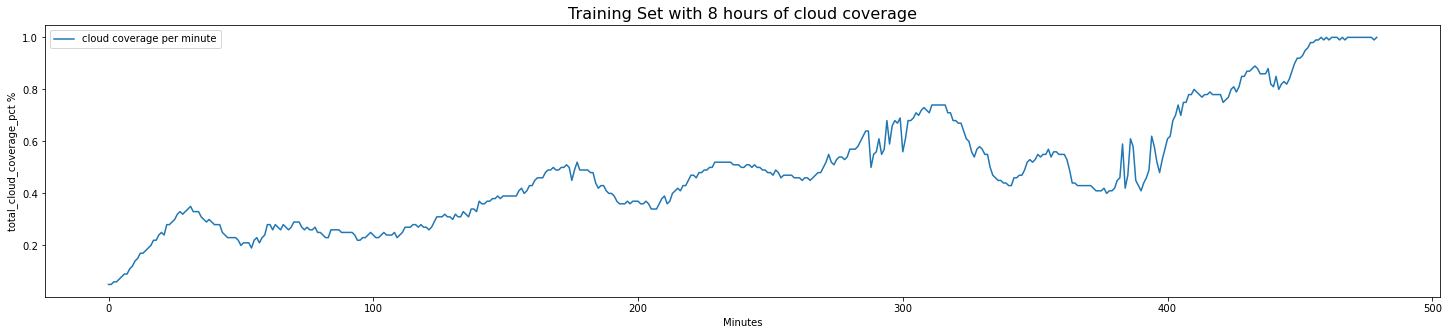

In [13]:
print("Univariate Training Set size for only 8 hours of data in minutes", train.shape)

plt.figure(figsize=(25,5))
plt.plot(train[0, :, -1], label="cloud coverage per minute")
plt.xlabel("Minutes")
plt.ylabel("total_cloud_coverage_pct %")
plt.legend()
plt.title("Training Set with 8 hours of cloud coverage", fontsize=16)
plt.show()

## Sampling and Standard Scaling Dataset
### Input feed 35 mins and Predicting next 30 mins

In [14]:
INPUT_DURATION_MINS = 35
PRED_DURATION_MINS = 30

train_x , train_y = to_supervised(train, INPUT_DURATION_MINS,  PRED_DURATION_MINS)
print("Training shape: X",train_x.shape," y", train_y.shape)

test_x, test_y = to_supervised(test, INPUT_DURATION_MINS,  PRED_DURATION_MINS)
print("Test shape: X",test_x.shape," y", test_y.shape)

#Standard Scaling
scaler , train_x_transformed, test_x_transformed = fit_transform_standard_scaler(train_x, test_x)
scaler.inverse_transform(test_x_transformed)[-1, 10, :], test_x[-1, 10, :], test_y[-1]

Training shape: X (23712, 35, 7)  y (23712, 30)
Test shape: X (2080, 35, 7)  y (2080, 30)


(array([ 1.02025e+03,  3.21500e+01,  1.25780e+01, -5.62200e+00,
         1.20100e+02,  1.77000e-01,  3.30000e-01]),
 array([ 1.02025e+03,  3.21500e+01,  1.25780e+01, -5.62200e+00,
         1.20100e+02,  1.77000e-01,  3.30000e-01]),
 array([0.22, 0.22, 0.22, 0.23, 0.21, 0.2 , 0.19, 0.19, 0.21, 0.24, 0.24,
        0.25, 0.21, 0.22, 0.22, 0.23, 0.24, 0.25, 0.25, 0.23, 0.24, 0.22,
        0.2 , 0.21, 0.22, 0.21, 0.22, 0.25, 0.24, 0.25]))

Training size: Input shape (23712, 35, 7) , Output shape (23712, 30)


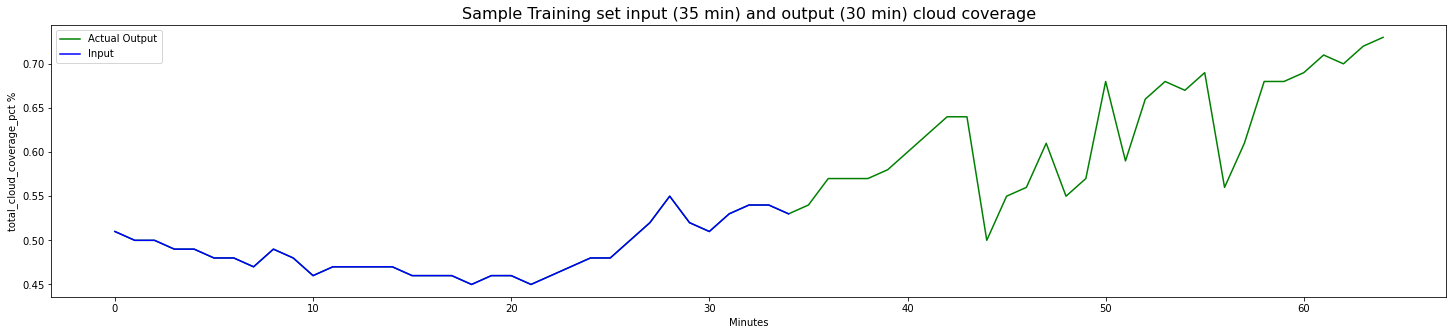

In [16]:
print("Training size: Input shape", train_x.shape, ", Output shape", train_y.shape)
plt.figure(figsize=(25,5))

item = 244

plt.plot(np.concatenate([train_x[item, :, -1].flatten(), train_y[item]]), 'g-', label="Actual Output")
plt.plot(train_x[item, :, -1].flatten(), 'b-', label="Input")
plt.xlabel("Minutes")
plt.ylabel("total_cloud_coverage_pct %")
plt.legend()
plt.title("Sample Training set input ({} min) and output ({} min) cloud coverage".format(INPUT_DURATION_MINS,PRED_DURATION_MINS), fontsize=16)
plt.show()

#### 1) LSTM_2_V1 - LSTM with 2 layers

In [23]:
tf.random.set_seed(EXPERIEMENT_SEED)
# define parameters
verbose, epochs, batch_size = 0, 20, 180
n_timesteps, n_features, n_outputs = train_x_transformed.shape[1], train_x_transformed.shape[2], train_y.shape[1]
# define model
model = Sequential()
model.add(LSTM(100, activation='sigmoid', input_shape=(n_timesteps, n_features), return_sequences = True))
model.add(LSTM(50, activation='sigmoid', input_shape=(n_timesteps, n_features), return_sequences = False))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(n_outputs, activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

print(model.summary())
history = model.fit(train_x_transformed, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x_transformed, test_y))

weather_models['LSTM_2_V1'] = (model,history)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 35, 100)           43200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
132/132 [==============================] - 82s 541ms/step - loss: 0.2260 - mae: 0.2260 - val_loss: 0.1027 - val_mae: 0.1027
Epoch 2/20
132/132 [==============================] - 70s 533ms/step - loss: 0.0766 - mae: 0.0766 - val_loss

In [24]:
test_pred_y = model.predict(test_x_transformed)
train_pred_y = model.predict(train_x_transformed)
print("Prediction Shapes: Train {}, Test {} \n".format(train_pred_y.shape, test_pred_y.shape))

train_rmse_scores, train_mae_scores= evaluate_forecasts_daily_eod_prediction(train_pred_y , train_y, days_sampled=train.shape[0])
test_rmse_scores, test_mae_scores= evaluate_forecasts_daily_eod_prediction(test_pred_y , test_y, days_sampled=test.shape[0])

print("Train --> mse: ", (train_rmse_scores), ", mae: ",(train_mae_scores))
print("Test --> mse: ", (test_rmse_scores), ", mae: ",(test_mae_scores))

Prediction Shapes: Train (23712, 30), Test (2080, 30) 

Train --> mse:  [15.204947635103371] , mae:  [9.73159085763128]
Test --> mse:  [4.816446356659874] , mae:  [3.485747975111008]


#### Debugging Model Response
TODO: Simulate this prediction plot for real time data

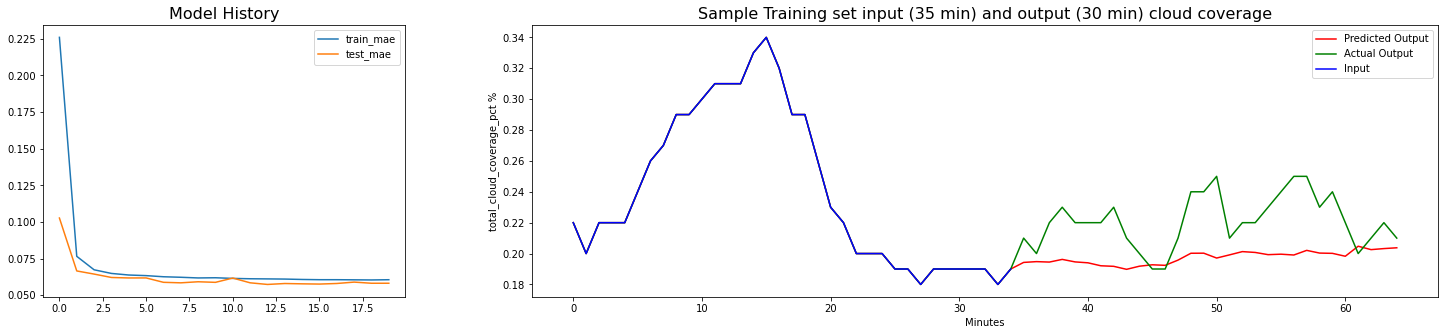

In [33]:
plot_model_evaluation(history, test_x, test_pred_y, test_y, (415 * 5))

#### 2) LSTM_1_V1 - LSTM with 1 layer

In [20]:
tf.random.set_seed(EXPERIEMENT_SEED)
# define parameters
verbose, epochs, batch_size = 0, 20, 180
n_timesteps, n_features, n_outputs = train_x_transformed.shape[1], train_x_transformed.shape[2], train_y.shape[1]
# define model
model = Sequential()
model.add(LSTM(200, activation='sigmoid', input_shape=(n_timesteps, n_features)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(n_outputs, activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

print(model.summary())
history = model.fit(train_x_transformed, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x_transformed, test_y))

weather_models['LSTM_1_V1'] = (model,history)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               166400    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
Total params: 189,530
Trainable params: 189,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
132/132 [==============================] - 40s 258ms/step - loss: 0.1983 - mae: 0.1983 - val_loss: 0.0915 - val_mae: 0.0915
Epoch 2/20
132/132 [==============================] - 33s 247ms/step - loss: 0.0738 - mae: 0.0738 - val_loss: 0.0730 - val_mae: 0.0730
Epoch 3/20
132/132 [==============================] - 33s 247ms/step - loss: 0.0664 - mae: 0.0664 - val

In [21]:
test_pred_y = model.predict(test_x_transformed)
train_pred_y = model.predict(train_x_transformed)
print("Prediction Shapes: Train {}, Test {} \n".format(train_pred_y.shape, test_pred_y.shape))

train_rmse_scores, train_mae_scores= evaluate_forecasts_daily_eod_prediction(train_pred_y , train_y, days_sampled=train.shape[0])
test_rmse_scores, test_mae_scores= evaluate_forecasts_daily_eod_prediction(test_pred_y , test_y, days_sampled=test.shape[0])

print("Train --> mse: ", (train_rmse_scores), ", mae: ",(train_mae_scores))
print("Test --> mse: ", (test_rmse_scores), ", mae: ",(test_mae_scores))

Prediction Shapes: Train (23712, 30), Test (2080, 30) 

Train --> mse:  [14.859537934685749] , mae:  [9.480820655822756]
Test --> mse:  [5.695164137521923] , mae:  [4.6719745874404905]


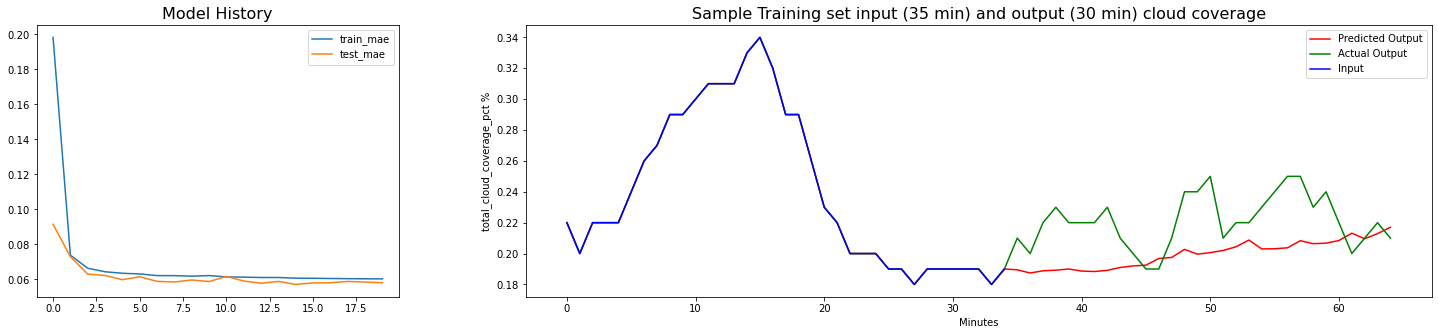

In [22]:
plot_model_evaluation(history, test_x, test_pred_y, test_y, (415 * 5))

## Saving models

In [38]:
for key, (model,history) in weather_models.items():
    model.save("models/quick/"+key)

INFO:tensorflow:Assets written to: models/quick/LSTM_2_V1\assets
INFO:tensorflow:Assets written to: models/quick/LSTM_1_V1\assets
